## Prediction of Titanic Survivors using Random Forest

### Author: Prajwal S(prajwalk7@gmail.com)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic_df = pd.read_csv('train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
titanic_df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

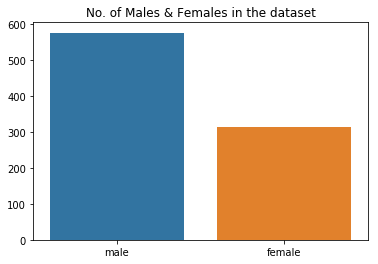

In [19]:
sns.barplot(x = list(titanic_df['Sex'].value_counts().index), y = list(titanic_df.Sex.value_counts()))
plt.title("No. of Males & Females in the dataset")
plt.show()

In [20]:
titanic_df.groupby(['Pclass', 'Sex', 'Embarked']).size()

Pclass  Sex     Embarked
1       female  C            43
                Q             1
                S            48
        male    C            42
                Q             1
                S            79
2       female  C             7
                Q             2
                S            67
        male    C            10
                Q             1
                S            97
3       female  C            23
                Q            33
                S            88
        male    C            43
                Q            39
                S           265
dtype: int64

In [24]:
titanic_df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [34]:
print(titanic_df.groupby(['Pclass','Sex']).size())

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


In [31]:
sex_age_df = pd.crosstab(index=[titanic_df['Pclass']], columns=[titanic_df['Sex']])
sex_age_df

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [32]:
type(sex_age_df)

pandas.core.frame.DataFrame

In [50]:
a = list(sex_age_df.columns)

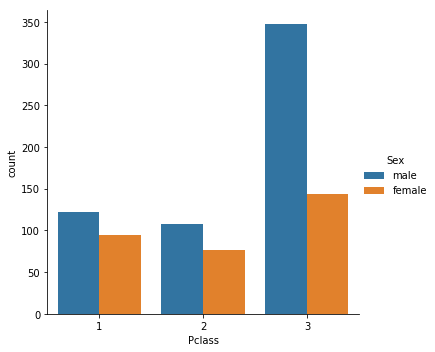

In [61]:
sns.factorplot(x = 'Pclass', data = titanic_df, kind = 'count', hue = 'Sex')
plt.show()

In [85]:
def male_female_child(passanger):
    if passanger.Age < 16:
        return 'child'
    else:
        return passanger.Sex

In [91]:
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [92]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [93]:
titanic_df.groupby(['Pclass', 'Person']).size()

Pclass  Person
1       child       6
        female     91
        male      119
2       child      19
        female     66
        male       99
3       child      58
        female    114
        male      319
dtype: int64

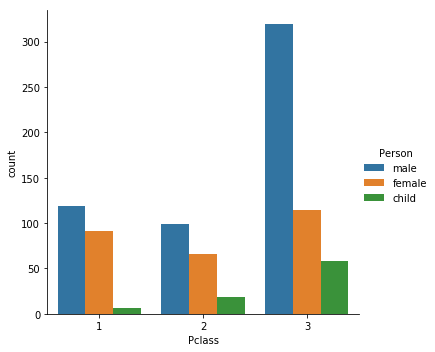

In [96]:
sns.factorplot('Pclass', kind = 'count', data = titanic_df, hue = 'Person')
plt.show()

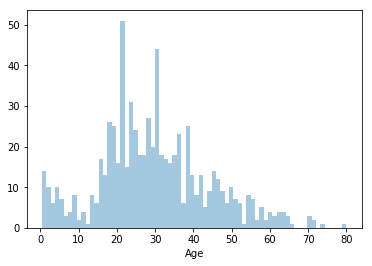

In [108]:
sns.distplot(a = titanic_df.Age.dropna(), bins = 70, kde = False)
plt.show()

In [109]:
titanic_df.Age.mean()

29.69911764705882

In [110]:
titanic_df.Person.value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

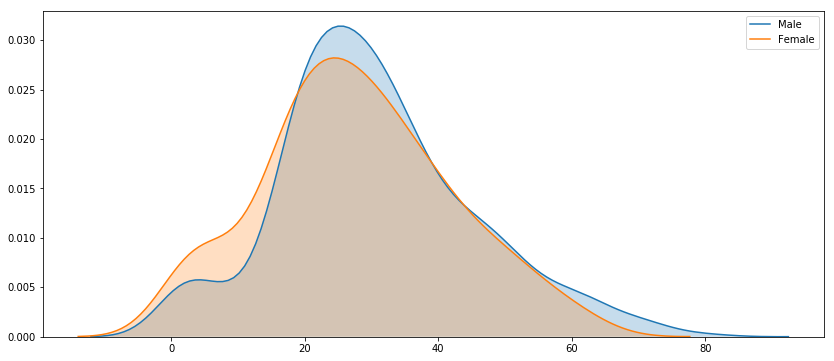

In [124]:
plt.figure(figsize = (14,6))
sns.kdeplot(data = titanic_df[titanic_df['Sex']=='male']['Age'], shade = True, label = 'Male')
sns.kdeplot(data = titanic_df[titanic_df['Sex']=='female']['Age'], shade = True, label = 'Female')
plt.show()

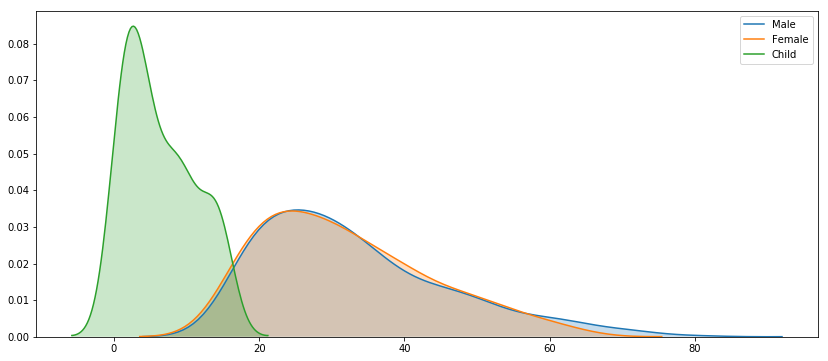

In [131]:
plt.figure(figsize = (14,6))
sns.kdeplot(data = titanic_df[titanic_df['Person']=='male']['Age'], shade = True, label = 'Male')
sns.kdeplot(data = titanic_df[titanic_df['Person']=='female']['Age'], shade = True, label = 'Female')
sns.kdeplot(data = titanic_df[titanic_df['Person']=='child']['Age'], shade = True, label = 'Child')
plt.show()

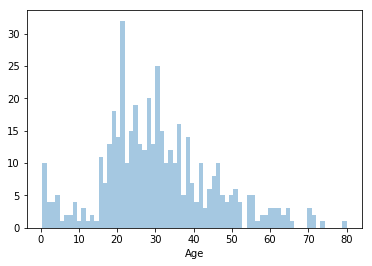

In [135]:
sns.distplot(a = titanic_df[titanic_df['Sex'] == 'male']['Age'], bins = 70, kde = False)
plt.show()

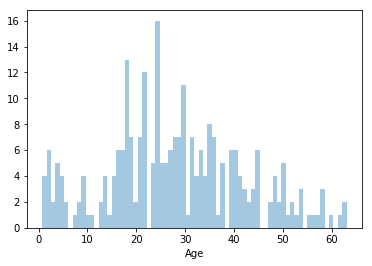

In [136]:
sns.distplot(a = titanic_df[titanic_df['Sex'] == 'female']['Age'], bins = 70, kde = False)
plt.show()

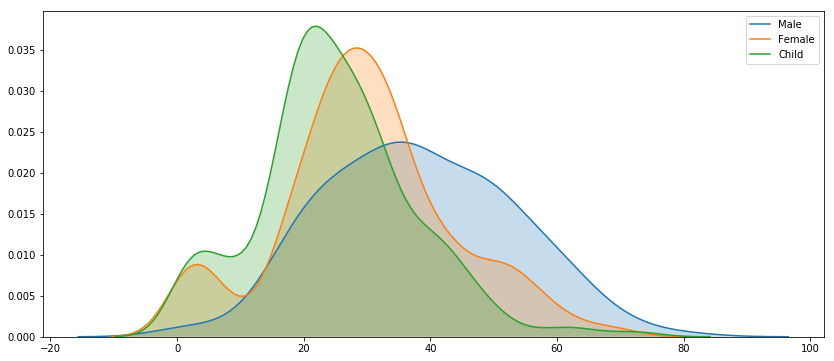

In [138]:
plt.figure(figsize = (14,6))
sns.kdeplot(data = titanic_df[titanic_df['Pclass']==1]['Age'], shade = True, label = 'Male')
sns.kdeplot(data = titanic_df[titanic_df['Pclass']==2]['Age'], shade = True, label = 'Female')
sns.kdeplot(data = titanic_df[titanic_df['Pclass']==3]['Age'], shade = True, label = 'Child')
plt.show()

In [141]:
p_null = ((len(titanic_df) - titanic_df.count())/len(titanic_df)) * 100.0

In [145]:
p_null

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Person          0.000000
dtype: float64

In [144]:
p_null['Cabin']

77.10437710437711

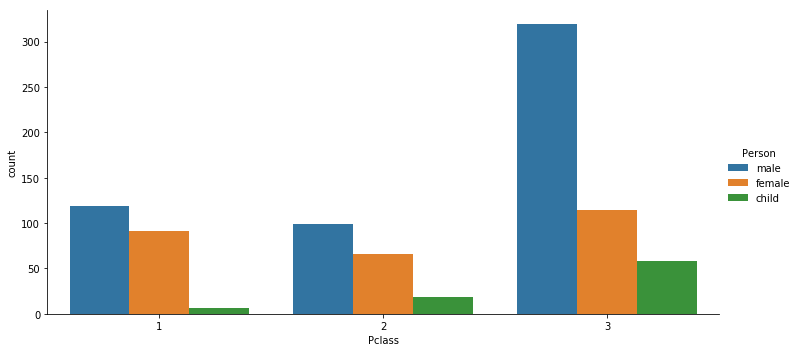

In [150]:
sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Person', aspect = 2)
plt.show()

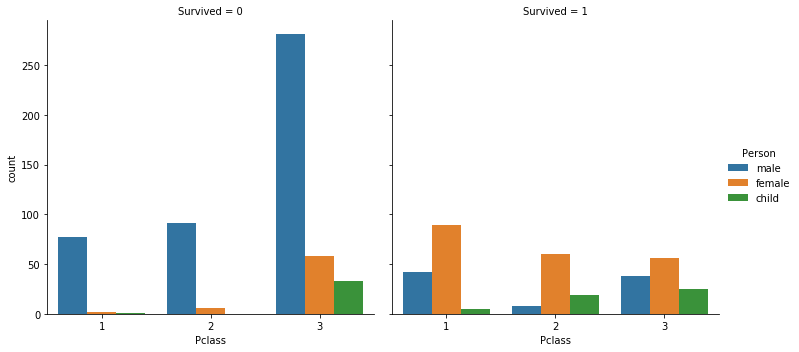

In [155]:
sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Person', col = 'Survived', aspect = 1)
plt.show()

## Where did the passengers come from i.e. Where did the passengers land into the ship from?

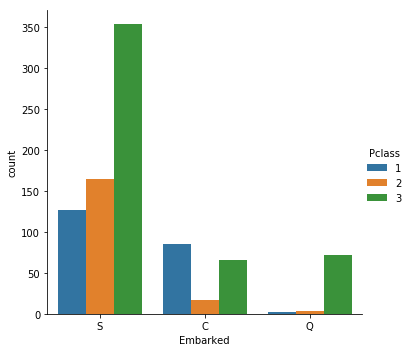

In [158]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass')
plt.show()

From the figure above, one may conclude that almost all of the passengers who boarded from Queenstown were in third class. On the other hand, many who boarded from Cherbourg were in first class. The biggest portion of passengers who boarded the ship came from Southampton, in which 353 passengers were in third class, 164 in second class and 127 passengers were in first class. In such cases, one may need to look at the economic situation at these different towns at that period of time to understand why most passengers who boarded from Queenstown were in third class for example.

In [159]:
titanic_df.groupby(['Embarked', 'Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

In [160]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [163]:
embarked_vs_pclass = pd.crosstab(index = titanic_df['Embarked'], columns = titanic_df['Pclass'], margins = True)

In [164]:
embarked_vs_pclass

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


In [167]:
def alone_with_family(passanger):
    if passanger.Parch == 0 and passanger.SibSp == 0:
        return 'alone'
    else:
        return 'with_family'

In [168]:
titanic_df['alone_or_with_family'] = titanic_df[['SibSp', 'Parch']].apply(alone_with_family, axis = 1)

In [170]:
titanic_df['alone_or_with_family'].value_counts()

alone          537
with_family    354
Name: alone_or_with_family, dtype: int64

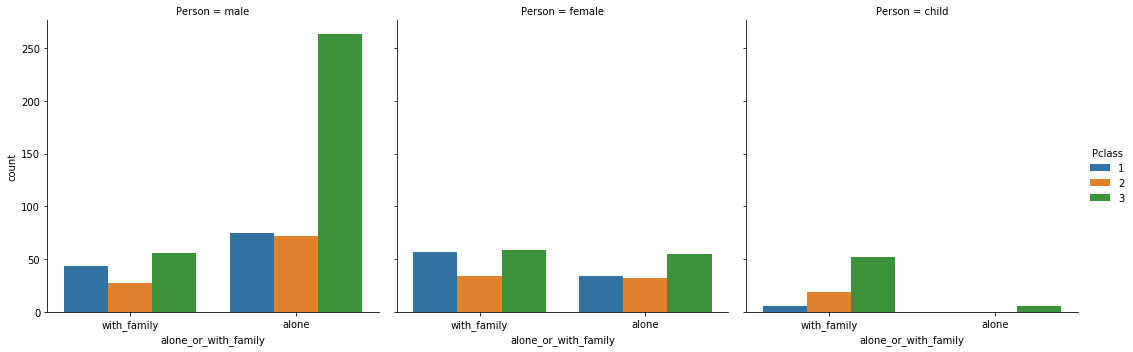

In [174]:
sns.factorplot('alone_or_with_family', data = titanic_df, kind = 'count', hue = 'Pclass', col = 'Person')
plt.show()

In [177]:
pd.crosstab(index = [titanic_df['alone_or_with_family'], titanic_df['Person']], columns = [titanic_df['Pclass']])

Pclass                        1   2    3
alone_or_with_family Person             
alone                child    0   0    6
                     female  34  32   55
                     male    75  72  263
with_family          child    6  19   52
                     female  57  34   59
                     male    44  27   56

In [253]:
def titanic_preprocessing(train, test):
#Load the dataframes using the reference, and combine the two dataframes to work on their data simulutaneaously
    train_df = pd.read_csv(train)
    test_df = pd.read_csv(test)
    combine = [train_df, test_df]
#Drop the 'Ticket', and 'Cabin' columns as they are not of relevancy    
    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]
#Make a new column 'Title' with everyone's designation
    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])
#Replace uncommon titles with 'Rare'
    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#Correct incorrect titles
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#Map the titles to numbers and fill '0' to missing titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
#Drop 'Name' and 'PassangerId' columns
    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]
#Map 'Sex' to numbers
    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#An array of 2 rows and 3 columns with 0's, representing the value of age to be filled for different combinations of 'Sex' 
#and 'Pclass'
    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                age_guess = guess_df.median()

                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)
#New 'FamilySize' column
    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

#New 'IsAlone' columns

    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]
#the most commonly used port to 'Embark' from(mode)
    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
#Filling the missing values with the mode of 'Embarked'
    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
    
    train_df = pd.get_dummies(train_df)
    test_df  = pd.get_dummies(test_df)

    test_df.head(10)
    return (train_df, test_df)

In [256]:
train = 'train.csv'
test = 'test.csv'
titanic_train, titanic_test = titanic_preprocessing(train, test)

In [255]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,1,2,0,0,0,1
1,1,1,1,38,1,0,71.2833,3,2,0,1,0,0
2,1,3,1,26,0,0,7.9250,2,1,1,0,0,1
3,1,1,1,35,1,0,53.1000,3,2,0,0,0,1
4,0,3,0,35,0,0,8.0500,1,1,1,0,0,1


In [257]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7.8292,1,1,1,0,1,0
1,893,3,1,47,1,0,7.0000,3,2,0,0,0,1
2,894,2,0,62,0,0,9.6875,1,1,1,0,1,0
3,895,3,0,27,0,0,8.6625,1,1,1,0,0,1
4,896,3,1,22,1,1,12.2875,3,3,0,0,0,1


In [258]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

In [259]:
Y_train = titanic_train['Survived']

In [260]:
X_train = titanic_train.iloc[:,1:]

In [261]:
clf = clf.fit(X_train, Y_train)

In [265]:
Y_pred = clf.predict(titanic_test.iloc[:,1:])

In [278]:
df_pred = pd.DataFrame([titanic_test.iloc[:,0], Y_pred]).T

In [283]:
df_pred.rename(columns = {'Unnamed 0': 'Survived'}, inplace = True)

In [284]:
df_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [301]:
df_pred.to_csv('prediction_decision_tree.csv', index=False)

In [302]:
df_pred.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf1 = RandomForestClassifier(n_estimators=15,criterion='gini',min_samples_leaf=5, max_depth=5,max_features='sqrt')

In [299]:
clf1 = clf1.fit(X_train,Y_train)
Y_pred_random_forest = clf1.predict(titanic_test.iloc[:,1:])
df_random = pd.DataFrame(np.array([titanic_test.iloc[:,0],Y_pred_random_forest]).T,columns=['PassengerId','Survived'])
df_random.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [300]:
df_random.to_csv('prediction_random_forest.csv',index=False)